# Hough Lines

In [1]:
# git partially cloning
repo='cvnd-exercises'
sub_dir='1_2_Convolutional_Filters_Edge_Detection'
url='https://github.com/linked0/' + repo + '.git'
!mkdir $repo
%cd $repo
!git init
!git remote add -f origin $url
!git config core.sparsecheckout true
!echo $sub_dir >> .git/info/sparse-checkout
!git pull --recurse-submodules origin master
%cd $sub_dir
!ls


mkdir: cannot create directory ‘cvnd-exercises’: File exists
/content/cvnd-exercises
Reinitialized existing Git repository in /content/cvnd-exercises/.git/
fatal: remote origin already exists.
remote: Counting objects: 4, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/linked0/cvnd-exercises
 * branch            master     -> FETCH_HEAD
   65ee508..98aa12c  master     -> origin/master
Updating 65ee508..98aa12c
Fast-forward
 .../5. Canny Edge Detection.ipynb                  | 506 +++++++++++++++------
 1 file changed, 368 insertions(+), 138 deletions(-)
/content/cvnd-exercises/1_2_Convolutional_Filters_Edge_Detection
1. Fourier Transform.ipynb
2. Finding Edges and Custom Kernels.ipynb
3. Gaussian Blur.ipynb
4. Fourier Transform of Filters.ipynb
5. Canny Edge Detection.ipynb
6_1. Hough lines.ipynb
6_2. Hough circles, agriculture.ipynb
7. Haar Cascade, Face Detec

### Import resources and display the image

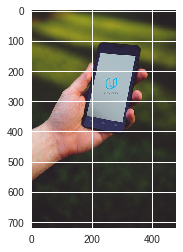

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
%config InlineBackend.close_figures=True

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ax = plt.imshow(image)
ax.grid=False

### Perform edge detection

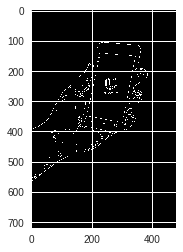

In [17]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

### >>> 여기서 min_line_length를 100으로 올리니 딱 핸드폰 스크린 모양만 찾아냈다!!!

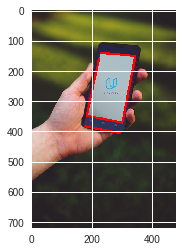

In [19]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)